## **Baseball Analysis Portfolio Project**

#### Author: Emily Nguyen

### **Data Dictionary:**

`p_formatted_ip`: number of innings a pitcher pitcher per year

`hit`: number of hits a pitcher gave up per year

`home_run`: number of home runs a pitcher gave up per year

`k_percent`: percentage of strikeouts the pitcher had per year

`bb_percent`: percentage of walks the pitcher had per year

`p_run`: number of runs a pitcher gave up per year

`p_era`: number of average earned runs a pitcher gave up per year

`p_rbi`: number of runs batted in a pitcher gave up per year

`p_hit_scoring`: number of hits scored the pitcher gave up per year

`pitch_count`: number of pitches thrown per year by pitcher

`f_strike_percent`: percentage of strikes a pitcher threw on the first pitch per year

### **Business Question:**

The business question that I am looking to answer is *Can we predict a pitcher’s earned run average (ERA) based on their performance metrics?* The performance metrics that I will be looking at are number of innings pitched, number of hits given up, number of home runs given up, strikeout percentage, walk percentage, number of runs given up, number of RBIs given up, number of hits that scored, and percentage of strikes from the first pitch. I will be using these variables to see if they have any relationship with the ERA (earned run average) of a pitcher. The dataset that I am using has 6152 entries from 2015-2023. This question could be critical to MLB teams as they are evaluating their pitchers and potentially looking at signing other pitchers. The ERA metric is a very important one in baseball as it correlates with how well a pitcher performs. The lower the ERA, the better. This could be useful for a team when they are looking at how much of a salary to offer these pitchers based on their performance. Additionally, teams want to lower their pitcher's ERA, so if their performance metrics can give insight on when to pull a pitcher out of the game so that they are not giving up runs, managers will want to know. A data-driven approach to analyzing a pitcher's performance not only has the ability to keep players healthy, but also contribute to the team winning.



---



**Mount Google Drive, load in data, display first 5 rows, and display descriptive statistics**

In [68]:
# Mount Google Drive
from os import environ
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [69]:
from pandas import read_csv
baseball = read_csv("/content/drive/MyDrive/MGSC310 Final Project/stats.csv")
baseball = baseball.drop('Unnamed: 15', axis=1) # I dropped this column because it only contains null values
baseball.head()

,"last_name, first_name",player_id,year,p_formatted_ip,hit,home_run,k_percent,bb_percent,p_run,p_era,p_rbi,p_hit_into_play,p_hit_scoring,pitch_count,f_strike_percent
0,"Colon, Bartolo",112526,2015,194.2,217,25,16.7,2.9,94,4.16,91,651,45,2706,66.6
1,"Hawkins, LaTroy",115629,2015,38.2,44,4,21.0,4.3,16,3.26,16,121,10,557,60.5
2,"Chen, Bruce",136600,2015,6.1,17,3,11.4,2.9,9,12.79,8,30,4,123,77.1
3,"Wolf, Randy",150116,2015,34.2,46,5,17.4,9.3,28,6.23,28,117,15,624,54.0
4,"Marquis, Jason",150302,2015,47.1,64,10,17.1,6.5,37,6.46,37,164,15,783,54.2


In [70]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6152 entries, 0 to 6151
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_name, first_name  6152 non-null   object 
 1   player_id              6152 non-null   int64  
 2   year                   6152 non-null   int64  
 3   p_formatted_ip         6152 non-null   float64
 4   hit                    6152 non-null   int64  
 5   home_run               6152 non-null   int64  
 6   k_percent              6152 non-null   float64
 7   bb_percent             6152 non-null   float64
 8   p_run                  6152 non-null   int64  
 9   p_era                  6152 non-null   float64
 10  p_rbi                  6152 non-null   int64  
 11  p_hit_into_play        6152 non-null   int64  
 12  p_hit_scoring          6152 non-null   int64  
 13  pitch_count            6152 non-null   int64  
 14  f_strike_percent       6152 non-null   float64
dtypes: f

In [71]:
baseball.columns.tolist()

['last_name, first_name',
 'player_id',
 'year',
 'p_formatted_ip',
 'hit',
 'home_run',
 'k_percent',
 'bb_percent',
 'p_run',
 'p_era',
 'p_rbi',
 'p_hit_into_play',
 'p_hit_scoring',
 'pitch_count',
 'f_strike_percent']

**Taking a look at the variables:**

Below, I have created scatterplots of all the independent variables vs. ERA (the target variable) to help identify trends and correlations.

In [72]:
import altair as alt

plot_ip = alt.Chart(baseball).mark_circle().encode(
    alt.X('p_era', axis=alt.Axis(title='Pitcher ERA')),
    alt.Y('p_formatted_ip', axis=alt.Axis(title='Innings Pitched'))
).properties(
    width=500,
    height=500,
    title='Pitcher ERA vs. Innings Pitcher'
).interactive()

plot_hit = alt.Chart(baseball).mark_circle().encode(
    alt.X('p_era', axis=alt.Axis(title='Pitcher ERA')),
    alt.Y('hit', axis=alt.Axis(title='Hits'))
).properties(
    width=500,
    height=500,
    title='Pitcher ERA vs. Hits'
).interactive()

plot_hr = alt.Chart(baseball).mark_circle().encode(
    alt.X('p_era', axis=alt.Axis(title='Pitcher ERA')),
    alt.Y('home_run', axis=alt.Axis(title='Home Runs'))
).properties(
    width=500,
    height=500,
    title='Pitcher ERA vs. Home Runs'
).interactive()

plot_k = alt.Chart(baseball).mark_circle().encode(
    alt.X('p_era', axis=alt.Axis(title='Pitcher ERA')),
    alt.Y('k_percent', axis=alt.Axis(title='Strike Percentage'))
).properties(
    width=500,
    height=500,
    title='Pitcher ERA vs. Strike Percentage'
).interactive()

plot_bb = alt.Chart(baseball).mark_circle().encode(
    alt.X('p_era', axis=alt.Axis(title='Pitcher ERA')),
    alt.Y('bb_percent', axis=alt.Axis(title='Walks Percentage'))
).properties(
    width=500,
    height=500,
    title='Pitcher ERA vs. Walks Percentage'
).interactive()

plot_run = alt.Chart(baseball).mark_circle().encode(
    alt.X('p_era', axis=alt.Axis(title='Pitcher ERA')),
    alt.Y('p_run', axis=alt.Axis(title='# of Runs'))
).properties(
    width=500,
    height=500,
    title='Pitcher ERA vs. # of Runs'
).interactive()

plot_rbi = alt.Chart(baseball).mark_circle().encode(
    alt.X('p_era', axis=alt.Axis(title='Pitcher ERA')),
    alt.Y('p_rbi', axis=alt.Axis(title='RBIs'))
).properties(
    width=500,
    height=500,
    title='Pitcher ERA vs. RBIs'
).interactive()

plot_count = alt.Chart(baseball).mark_circle().encode(
    alt.X('p_era', axis=alt.Axis(title='Pitcher ERA')),
    alt.Y('pitch_count', axis=alt.Axis(title='Pitch Count'))
).properties(
    width=500,
    height=500,
    title='Pitcher ERA vs. Pitch Count'
).interactive()


(plot_ip | plot_hit | plot_hr | plot_k | plot_bb | plot_run | plot_rbi | plot_count)

alt.HConcatChart(...)

#### **Linear Regression Model**

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

# drop columns with missing values
baseball.dropna(inplace=True)
baseball.reset_index(inplace=True)

# create X, y columns
X = baseball[['p_formatted_ip','hit','home_run','k_percent','bb_percent','p_run','p_rbi','p_hit_scoring','pitch_count']]
y = baseball['p_era']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)

# model the linear regression
lr = LinearRegression()

model_lr = lr.fit(X_train, y_train)

# predict
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)

# calculate MSE & R-squared
print("Train MSE : ", mean_squared_error(y_train,y_pred_train))
print("Train R2  : ", r2_score(y_train,y_pred_train))
print("Test MSE  : ", mean_squared_error(y_test,y_pred_test))
print("Test R2   : ", r2_score(y_test,y_pred_test))

Train MSE :  3.632053927588521
Train R2  :  0.4140216878865258
Test MSE  :  4.045462892954911
Test R2   :  0.39701734035774094


**Interpreting the Linear Regression Statistics:**

**MSE:** Mean squared error measures the average squared difference between the actual and predicted values. Typically, a lower MSE indicates a better performing model. The MSE for the training set is 3.63 and the MSE for the test set is 4.05. This means that the model performed better on the training set than the test set, which indicates that the model might be overfitting. This could mean that the model is too complex, and that we need to simply it.

**R-Squared:** R-Squared is a measure of how well the model explains the variance in a dataset. The values range from 0-1 where a value of 1 indicates that the model is perfect. Generally, we try to aim for a R-Squared value of 0.5 or greater. In this model, the R-Squared for the training set is 0.41 and 0.40 for the test set. This means that 40% of the variance in the test set is explained by the model. These are not very good R-Squared values, however, they are very similar for both the test and training set. Overall, the model is not terrible, but it could use a lot of improvement.

In [74]:
import statsmodels.api as sm

# OLS Regression Results
X_add_constant = sm.add_constant(X)

model = sm.OLS(y, X_add_constant).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  p_era   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     475.6
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        06:14:53   Log-Likelihood:                -12765.
No. Observations:                6152   AIC:                         2.555e+04
Df Residuals:                    6142   BIC:                         2.562e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.7437      0.136     42.

**Interpreting the OLS Regression Results:**

The OLS Regression Results gives us a good explanation of the impact of each of the independent variables on the target variable. We look at this through the coefficents and p-value for each variable. The p-value indicates the statistical significance of each variable, where a p-value of less than 0.05 indicates significance. Looking at the results from above, all of the independent variables except for p_hit_scoring is statistically significance in predicting pitcher's ERA. The coefficients represent the change in the dependent variable for every one-unit change in the independent variable. For example if we are looking at the home_run variable, we could say that for every home run given up by a pitcher, the pitcher's ERA goes up by a score of 0.0381.

#### **Elastic Net Regression**

To improve the linear regression model that I created, I am going to run an Elastic Net Regression. Elastic Net is a type of regularization that makes a model that is overfitting, more simple. The linear regression was overfitting because it performed well on the training set, but not as well on the test set. Elastic Net combines Lasso and Ridge penalties in hopes of creating a better performing model that only selects relvant variables.

In [75]:
from sklearn.linear_model import ElasticNet

# initialize EN
elastic_net = ElasticNet(alpha=0.3, l1_ratio=0.5)

# fit
elastic_net.fit(X_train, y_train)

# predict
y_pred_en = elastic_net.predict(X_test)

# evaluate MSE & R squared
print("Elastic Net MSE  : ", mean_squared_error(y_test,y_pred_en))
print("Elastic Net R2   : ", r2_score(y_test,y_pred_en))

Elastic Net MSE  :  4.044937683808547
Elastic Net R2   :  0.3970956236139028


**Interpreting the Elastic Net Statistics:**

The mean squared error for the Elastic Net Regression is 4.0449 which is ever so slightly lower than the mean squared error for the linear regression model. This means that the Elastic Net Regression performed better than the Linear Regression, but not by much. Additionally, the R-Squared value for the Elastic Net Regression is 0.397, which is the same as the R-Squared value for the Linear Regression model. This shows the that elastic net and linear regression models had the similar levels of performance with the Elastic Net performing slighly better, but not by much. This tells me that the regularization done by the Elastic Net did not do much to the variables to shrink them or eliminate them.

#### **Visualization Plots**

In [78]:
import altair as alt
import pandas as pd

train_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train, 'Dataset': 'Training'})
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test, 'Dataset': 'Test'})
combined_df = pd.concat([train_df, test_df])

# I had to take a sample because Altair gave me an error because the dataset was too large
chart_train = alt.Chart(train_df.sample(n=1000)).mark_circle().encode(
    x='Actual:Q',
    y='Predicted:Q',
    color='Dataset:N'
).properties(
    title='Predicted vs Actual (Training Set)',
    width=400,
    height=300
)

chart_test = alt.Chart(test_df.sample(n=1000)).mark_circle().encode(
    x='Actual:Q',
    y='Predicted:Q',
    color='Dataset:N'
).properties(
    title='Predicted vs Actual (Test Set)',
    width=400,
    height=300
)

# Regression lines
chart_train = chart_train + chart_train.transform_regression('Actual','Predicted').mark_line()
chart_test = chart_test + chart_test.transform_regression('Actual','Predicted').mark_line()

(chart_train | chart_test)

alt.HConcatChart(...)

**Interpreting Predicted vs. Actual Plots:**

The shape of both the training set and test set look pretty similar to each other which is a good thing because it tells us that the training set performs somewhat well. The line of regression represents the overall trend in the model's predictions and how well the model was at predicting pitcher's ERA. Points that are close to the line means that the predicted value was close to the actual value, which is what we want. In the graphs above, a good number of points are close to the line, however, not all of the points are around the line. There are many outliers and points that are far from the regression line. This gives us insight into the variability of the model. The graphs above show that the model's variability is somewhat accurate, but could be much better.

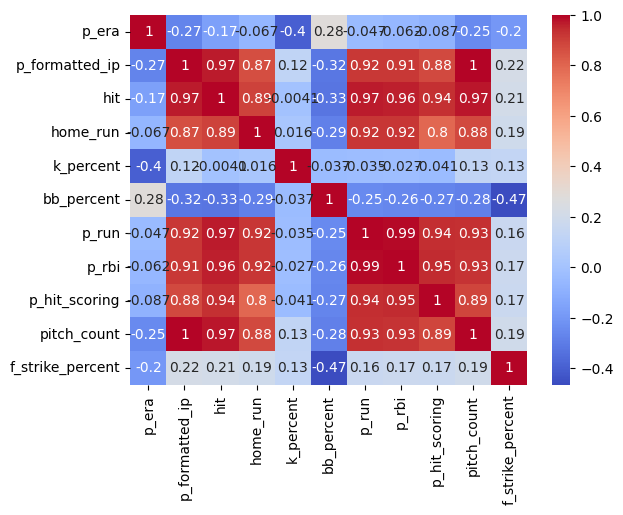

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = baseball[['p_era','p_formatted_ip', 'hit', 'home_run', 'k_percent', 'bb_percent', 'p_run', 'p_rbi', 'p_hit_scoring', 'pitch_count', 'f_strike_percent']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

**Interpreting Heatmap Visualization:**

A heatmap shows the variables in a matrix format where the correlation between variables are represented by colors. Values that are darker colors means that there is a strong correlation and values that are close to white means that there is a weak or no correlation. In the visualization above, red means that there is a positive correlation and blue means that there is a negative correlation. The heatmap gives us a visualization of any relationships between the variables. I can see that pitcher's ERA has a strong negative correlation with the strikeout percentage, but not with the other variables. Additionally, the number of hits has a strong relationship with the number of runs indicating that many hits turns into a run being scored.